In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_csv('data/student-merge.csv')
display(data.head())
data.shape

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G1.x,G2.x,G3.x,studytime.y,failures.y,paid.y,absences.y,G1.y,G2.y,G3.y
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,7,10,10,4,0,yes,4,13,13,13
1,GP,F,15,R,GT3,T,1,1,other,other,...,8,6,5,2,0,no,2,13,11,11
2,GP,F,15,R,GT3,T,2,2,at_home,other,...,14,13,13,1,0,no,8,14,13,12
3,GP,F,15,R,GT3,T,2,4,services,health,...,10,9,8,3,0,no,2,10,11,10
4,GP,F,15,R,GT3,T,3,3,services,services,...,10,10,10,3,0,yes,2,13,13,13


(370, 40)

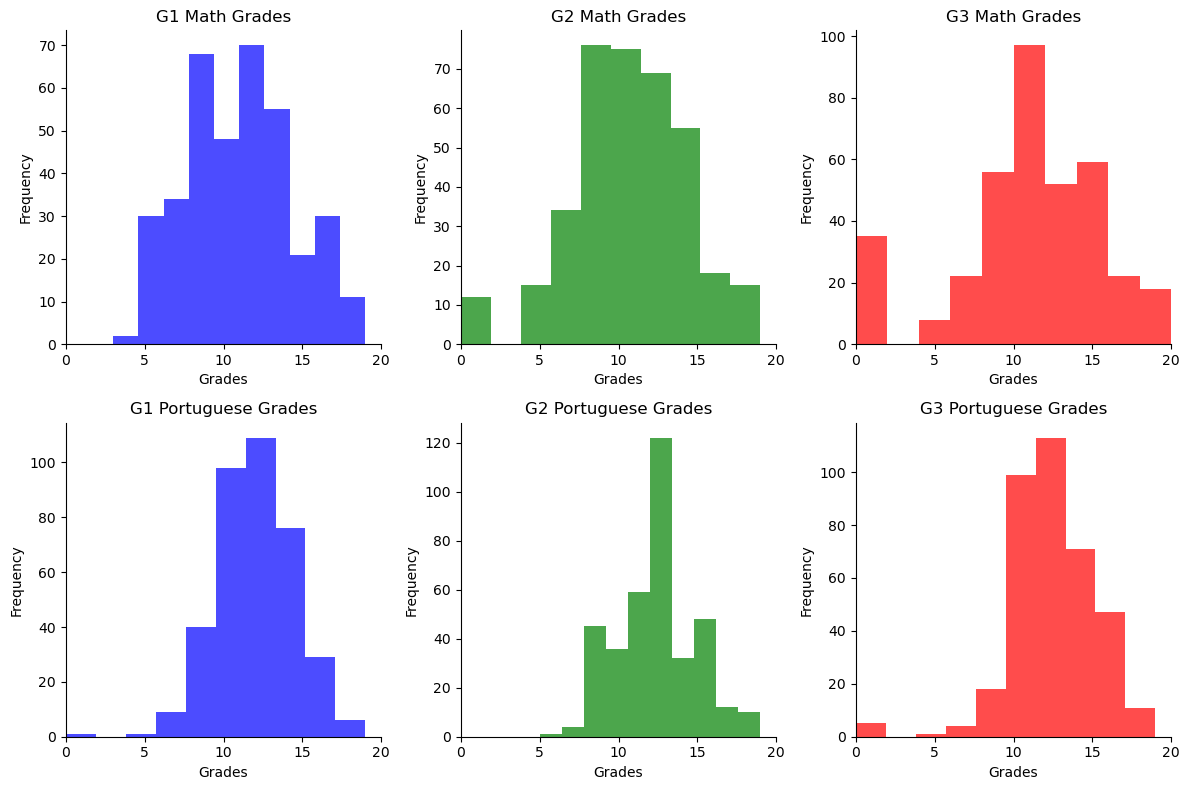

In [51]:
# show the histograms of g1 g2 g3 grades in one figure
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.hist(data['G1_math'], bins=10, color='blue', alpha=0.7)
plt.xlim(0, 20)  # Math grades typically range from 0 to 20
plt.title('G1 Math Grades')
sns.despine()
plt.xlabel('Grades')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(data['G2_math'], bins=10, color='green', alpha=0.7)
plt.xlim(0, 20)  # Math grades typically range from 0 to 20
plt.title('G2 Math Grades')
sns.despine()
plt.xlabel('Grades')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(data['G3_math'], bins=10, color='red', alpha=0.7)
plt.xlim(0, 20)  # Math grades typically range from 0 to 20
plt.title('G3 Math Grades')
sns.despine()
plt.xlabel('Grades')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(data['G1_por'], bins=10, color='blue', alpha=0.7)
plt.xlim(0, 20)  # Math grades typically range from 0 to 20
plt.title('G1 Portuguese Grades')
sns.despine()
plt.xlabel('Grades')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(data['G2_por'], bins=10, color='green', alpha=0.7)
plt.xlim(0, 20)  # Math grades typically range from 0 to 20
plt.title('G2 Portuguese Grades')
sns.despine()
plt.xlabel('Grades')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.hist(data['G3_por'], bins=10, color='red', alpha=0.7)
plt.xlim(0, 20)  # Math grades typically range from 0 to 20
plt.title('G3 Portuguese Grades')
sns.despine()
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [36]:
# check if any G1 G2 G3 is zero, if so set new column drop_math and drop_por to 1, otherwise 0
data['drop_math'] = np.where((data['G1_math'] == 0) | (data['G2_math'] == 0) | (data['G3_math'] == 0), 1, 0)
data['drop_por'] = np.where((data['G1_por'] == 0) | (data['G2_por'] == 0) | (data['G3_por'] == 0), 1, 0)

# remove the guy with G3_por =1 because there is error in the data
data = data[data['G3_por'] != 1]

data.to_csv('data/student-merge-processed.csv', index=False)

In [37]:
# remove student who dropped out
data_no_drop = data[(data['drop_math'] == 0) & (data['drop_por'] == 0)]
print(data_no_drop.shape)

(330, 34)


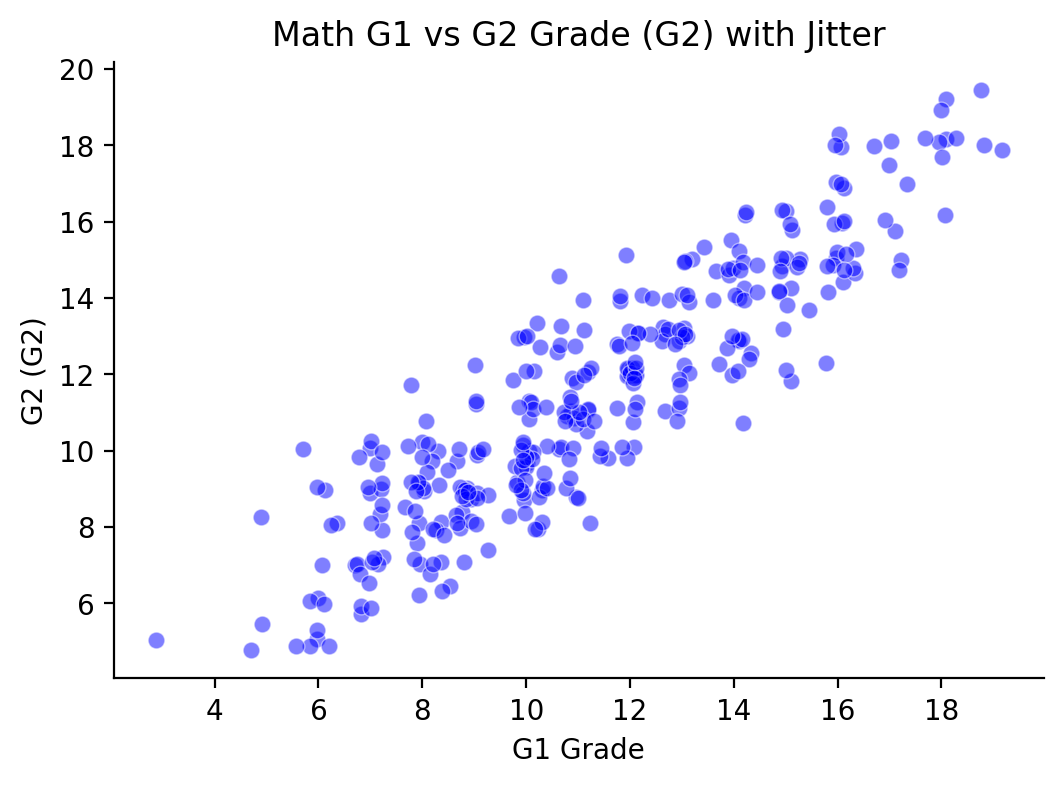

<Figure size 1000x600 with 0 Axes>

In [38]:
# math G1 vs G2 scatter plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)

jitter_x = data_no_drop['G1_math'] + np.random.normal(0, 0.2, size=len(data_no_drop['G1_math']))
jitter_y = data_no_drop['G2_math'] + np.random.normal(0, 0.2, size=len(data_no_drop['G2_math']))

sns.scatterplot(x=jitter_x, y=jitter_y, color='blue', alpha=0.5)
sns.despine()
plt.title('Math G1 vs G2 Grade (G2) with Jitter')
plt.xlabel('G1 Grade')
plt.ylabel('G2 (G2)')
plt.figure(figsize=(10, 6))
plt.show()

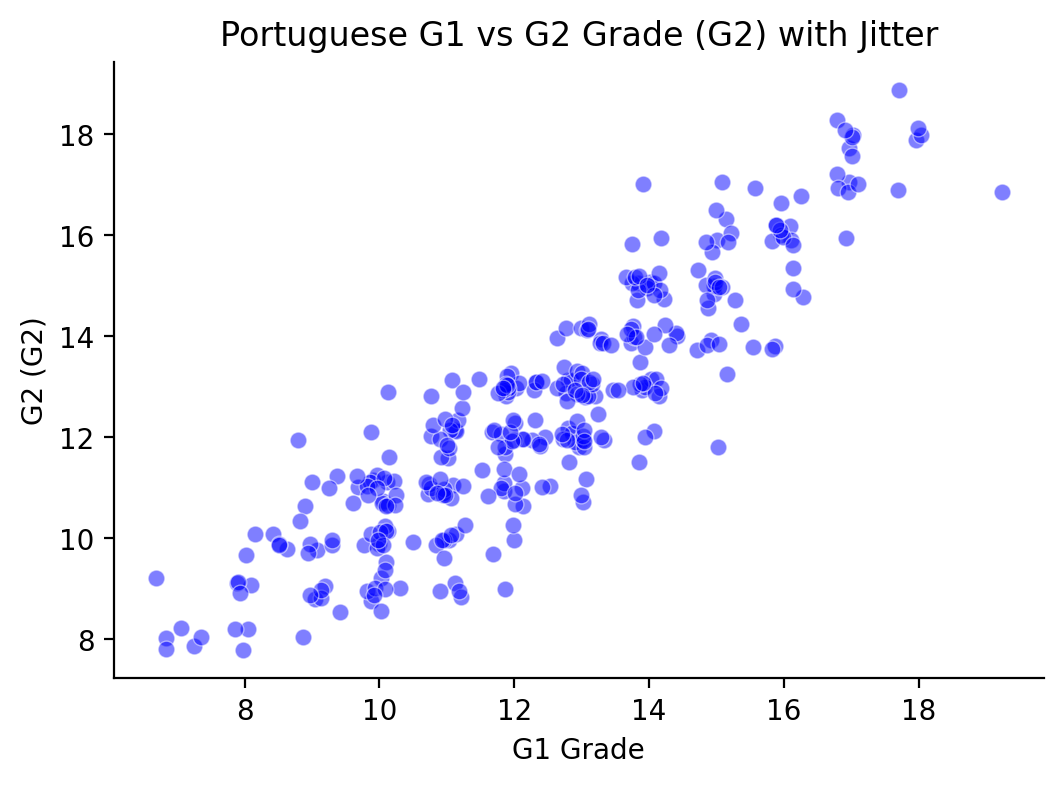

<Figure size 1000x600 with 0 Axes>

In [39]:
# math G1 vs G2 scatter plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)

jitter_x = data_no_drop['G1_por'] + np.random.normal(0, 0.2, size=len(data_no_drop['G1_por']))
jitter_y = data_no_drop['G2_por'] + np.random.normal(0, 0.2, size=len(data_no_drop['G2_por']))

sns.scatterplot(x=jitter_x, y=jitter_y, color='blue', alpha=0.5)
sns.despine()
plt.title('Portuguese G1 vs G2 Grade (G2) with Jitter')
plt.xlabel('G1 Grade')
plt.ylabel('G2 (G2)')
plt.figure(figsize=(10, 6))
plt.show()

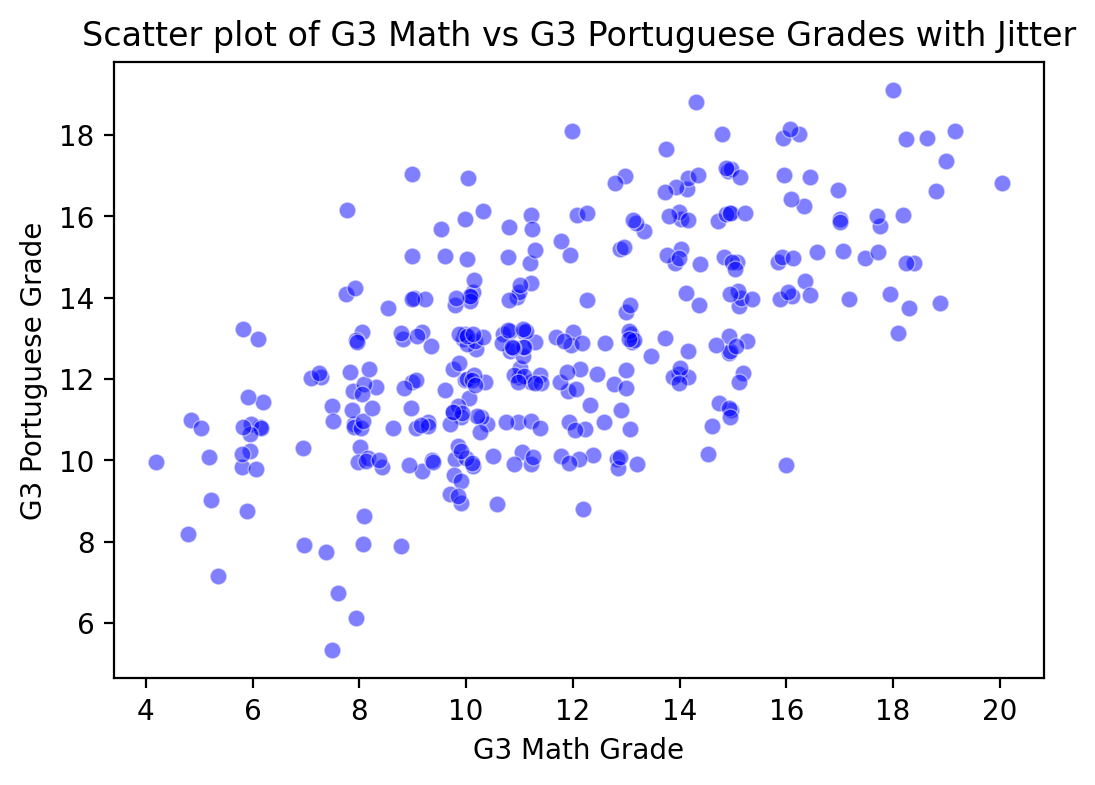

<Figure size 1000x600 with 0 Axes>

In [40]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)

jitter_x = data_no_drop['G3_math'] + np.random.normal(0, 0.2, size=len(data_no_drop['G3_math']))
jitter_y = data_no_drop['G3_por'] + np.random.normal(0, 0.2, size=len(data_no_drop['G3_por']))
sns.scatterplot(x=jitter_x, y=jitter_y, color='blue', alpha=0.5)
plt.title('Scatter plot of G3 Math vs G3 Portuguese Grades with Jitter')
plt.xlabel('G3 Math Grade')
plt.ylabel('G3 Portuguese Grade')
plt.figure(figsize=(10, 6))
plt.show()

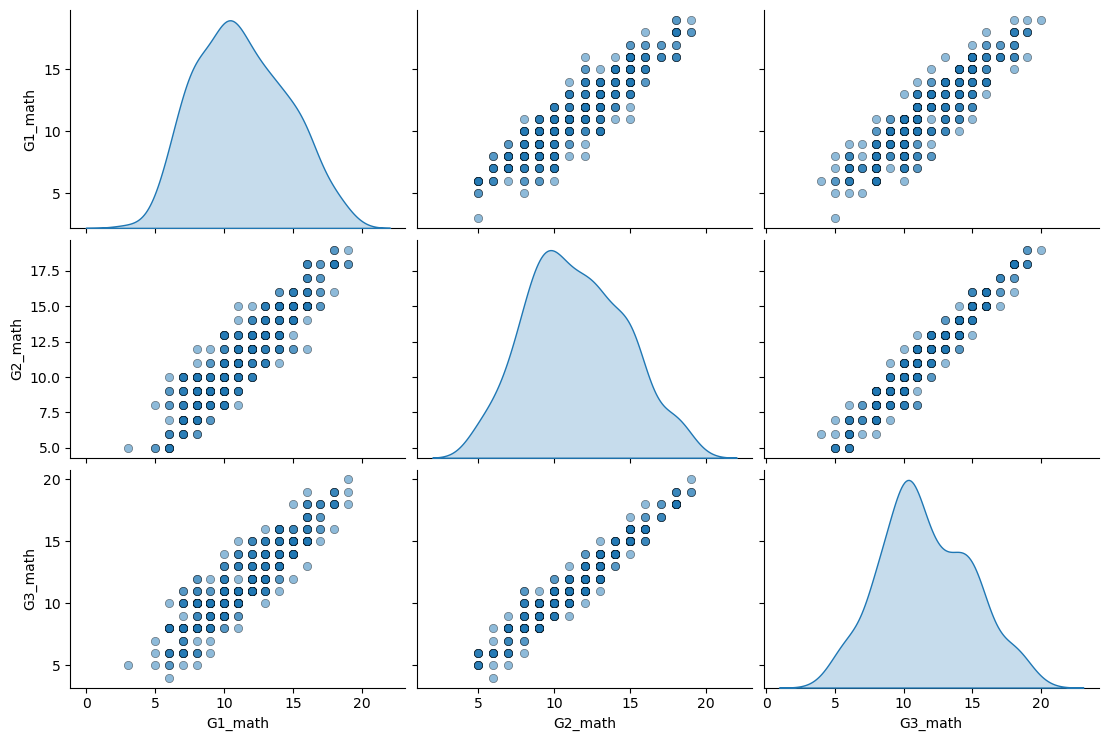

In [43]:
g = sns.pairplot(data_no_drop, 
                 x_vars=["G1_math", "G2_math", "G3_math"],
                 y_vars=["G1_math", "G2_math", "G3_math"],
                  height=2.5, aspect=1.5,
                  diag_kind='kde',  # Use kernel density estimation for the diagonal
                  plot_kws={'alpha': 0.5, 'edgecolor': 'k'})  # Set transparency and edge color for better visibility

plt.show()

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_22530/2252174486.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 1)


Correlation between G1 Math and G2 Math: 0.91
Correlation between G1 Math and G3 Math: 0.90
Correlation between G2 Math and G3 Math: 0.97
Correlation between G1 Portuguese and G2 Portuguese: 0.91
Correlation between G1 Portuguese and G3 Portuguese: 0.88
Correlation between G2 Portuguese and G3 Portuguese: 0.94


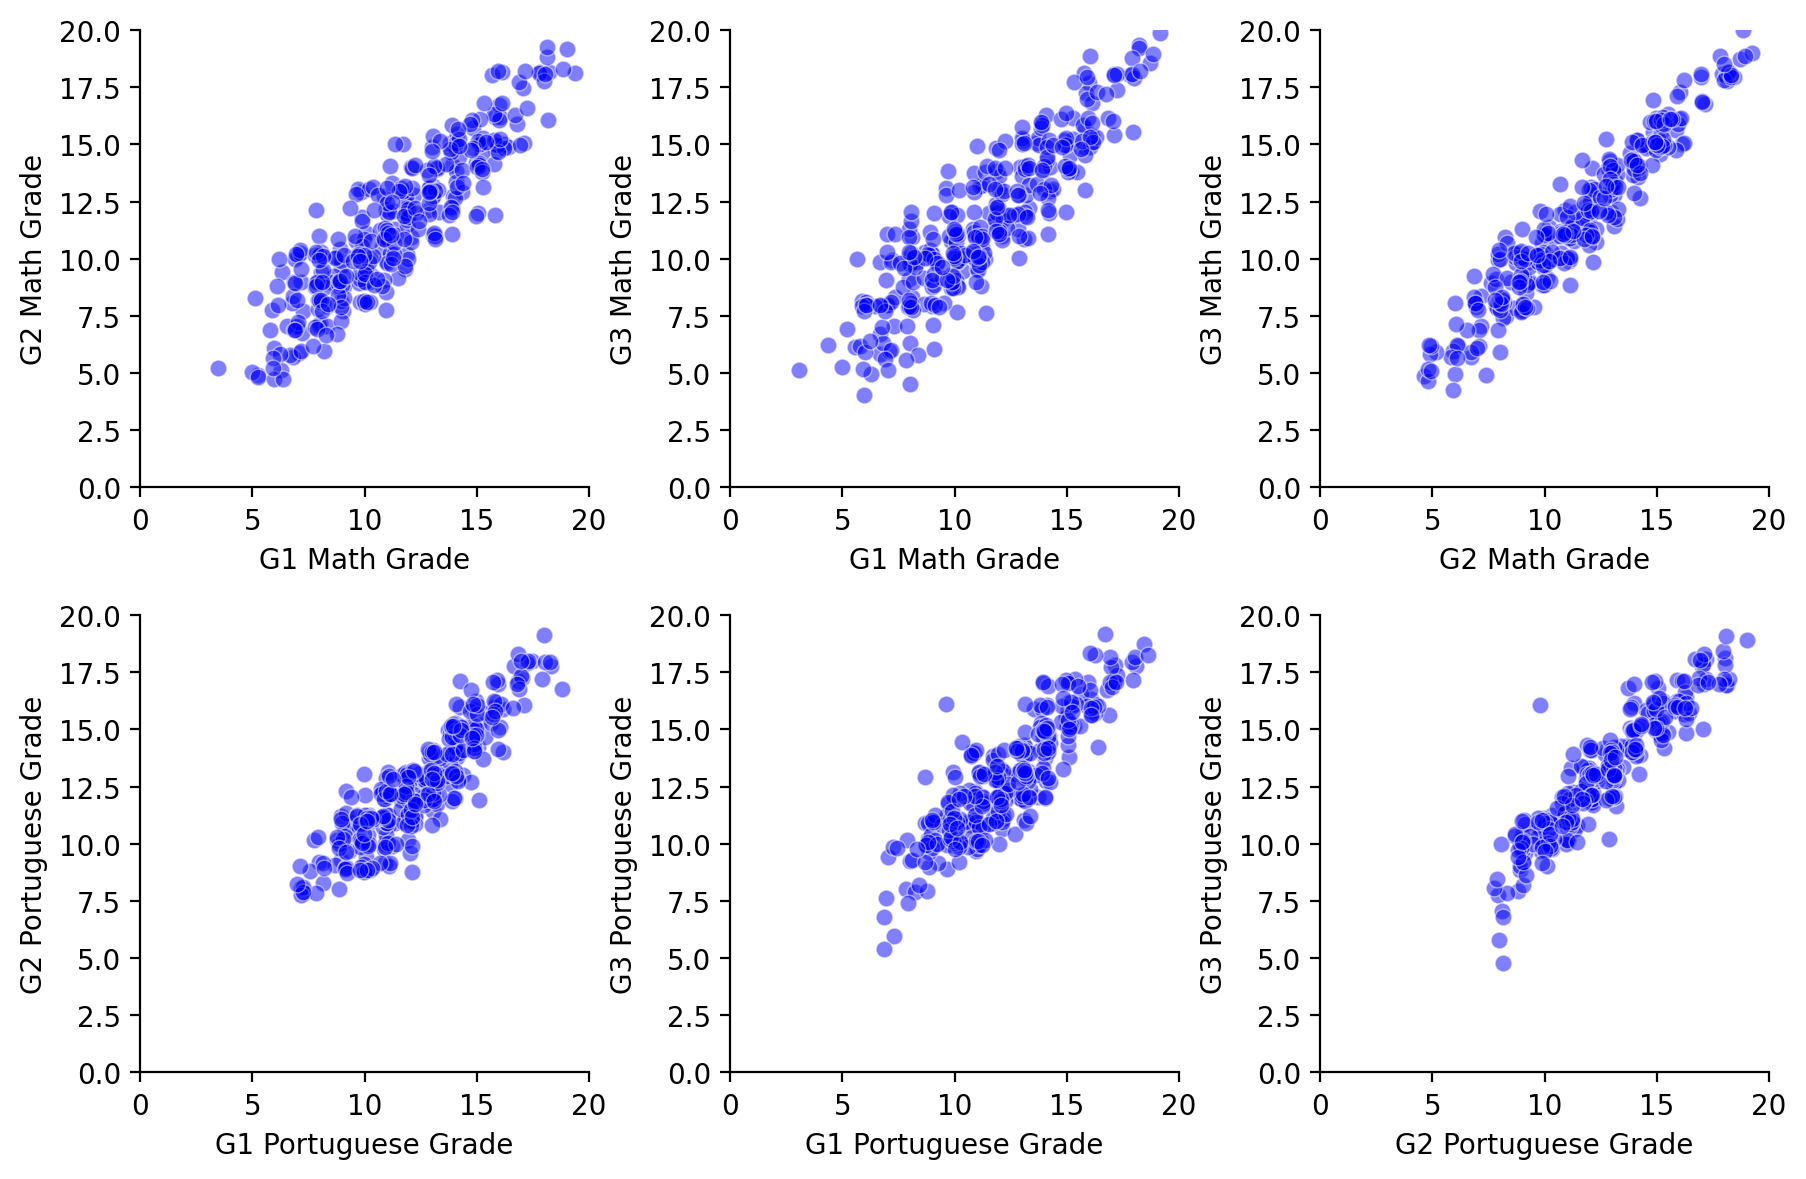

In [81]:
# correlation plots with jitter
# 2*2: top left G1_math vs G3_math , top right G2_math vs G3_math, bottom left G1_por vs G3_por, bottom right G2_por vs G3_por
fig, ax = plt.subplots(figsize=(9, 6), dpi=200)

plt.subplot(2, 3, 1)
jitter_x = data_no_drop['G1_math'] + np.random.normal(0, 0.2, size=len(data_no_drop['G1_math']))
jitter_y = data_no_drop['G2_math'] + np.random.normal(0, 0.2, size=len(data_no_drop['G2_math']))
sns.scatterplot(x=jitter_x, y=jitter_y, color='blue', alpha=0.5)
sns.despine()
plt.xlabel('G1 Math Grade')
plt.ylabel('G2 Math Grade')
plt.xlim(0, 20)
plt.ylim(0, 20)
# add rho to the bottom right corner of the first subplot
rho = data_no_drop[['G1_math', 'G2_math']].corr().iloc[0, 1]
print(f'Correlation between G1 Math and G2 Math: {rho:.2f}')

plt.subplot(2, 3, 2)
jitter_x = data_no_drop['G1_math'] + np.random.normal(0, 0.2, size=len(data_no_drop['G1_math']))
jitter_y = data_no_drop['G3_math'] + np.random.normal(0, 0.2, size=len(data_no_drop['G3_math']))
sns.scatterplot(x=jitter_x, y=jitter_y, color='blue', alpha=0.5)
sns.despine()
plt.xlabel('G1 Math Grade')
plt.ylabel('G3 Math Grade')
plt.xlim(0, 20)
plt.ylim(0, 20)
# add rho to the bottom right corner of the first subplot
rho = data_no_drop[['G1_math', 'G3_math']].corr().iloc[0, 1]
print(f'Correlation between G1 Math and G3 Math: {rho:.2f}')


plt.subplot(2, 3, 3)
jitter_x = data_no_drop['G2_math'] + np.random.normal(0, 0.2, size=len(data_no_drop['G2_math']))
jitter_y = data_no_drop['G3_math'] + np.random.normal(0, 0.2, size=len(data_no_drop['G3_math']))
sns.scatterplot(x=jitter_x, y=jitter_y, color='blue', alpha=0.5)
sns.despine()
plt.xlabel('G2 Math Grade')
plt.ylabel('G3 Math Grade')
plt.xlim(0, 20)
plt.ylim(0, 20)
# add rho to the bottom right corner
rho = data_no_drop[['G2_math', 'G3_math']].corr().iloc[0, 1]
print(f'Correlation between G2 Math and G3 Math: {rho:.2f}')

plt.subplot(2, 3, 4)
jitter_x = data_no_drop['G1_por'] + np.random.normal(0, 0.2, size=len(data_no_drop['G1_por']))
jitter_y = data_no_drop['G2_por'] + np.random.normal(0, 0.2, size=len(data_no_drop['G2_por']))
sns.scatterplot(x=jitter_x, y=jitter_y, color='blue', alpha=0.5)
sns.despine()
plt.xlabel('G1 Portuguese Grade')
plt.ylabel('G2 Portuguese Grade')
plt.xlim(0, 20)
plt.ylim(0, 20)
# add rho to the bottom right corner of the first subplot
rho = data_no_drop[['G1_por', 'G2_por']].corr().iloc[0, 1]
print(f'Correlation between G1 Portuguese and G2 Portuguese: {rho:.2f}')

plt.subplot(2, 3, 5)
jitter_x = data_no_drop['G1_por'] + np.random.normal(0, 0.2, size=len(data_no_drop['G1_por']))
jitter_y = data_no_drop['G3_por'] + np.random.normal(0, 0.2, size=len(data_no_drop['G3_por']))
sns.scatterplot(x=jitter_x, y=jitter_y, color='blue', alpha=0.5)
sns.despine()
plt.xlabel('G1 Portuguese Grade')
plt.ylabel('G3 Portuguese Grade')
plt.xlim(0, 20)
plt.ylim(0, 20)
# add rho to the bottom right corner
rho = data_no_drop[['G1_por', 'G3_por']].corr().iloc[0, 1]
print(f'Correlation between G1 Portuguese and G3 Portuguese: {rho:.2f}')


plt.subplot(2, 3, 6)
jitter_x = data_no_drop['G2_por'] + np.random.normal(0, 0.2, size=len(data_no_drop['G2_por']))
jitter_y = data_no_drop['G3_por'] + np.random.normal(0, 0.2, size=len(data_no_drop['G3_por']))
sns.scatterplot(x=jitter_x, y=jitter_y, color='blue', alpha=0.5)
sns.despine()
plt.xlabel('G2 Portuguese Grade')
plt.ylabel('G3 Portuguese Grade')
plt.xlim(0, 20)
plt.ylim(0, 20)
rho = data_no_drop[['G2_por', 'G3_por']].corr().iloc[0, 1]
print(f'Correlation between G2 Portuguese and G3 Portuguese: {rho:.2f}')

plt.tight_layout()
plt.show()




/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_22530/35635115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='address', y='G3_math', data=data_no_drop, palette='Set2')


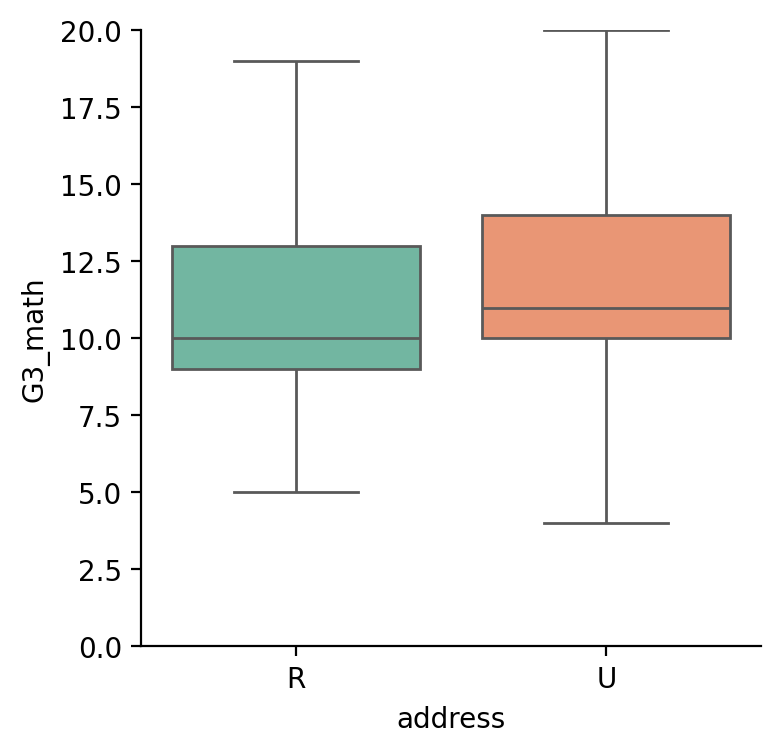

In [75]:
# urban vs rural (address) student G3 score
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sns.boxplot(x='address', y='G3_math', data=data_no_drop, palette='Set2')
plt.ylim(0, 20)
sns.despine()

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_22530/2203298550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='address', y='G3_por', data=data_no_drop, palette='Set2')


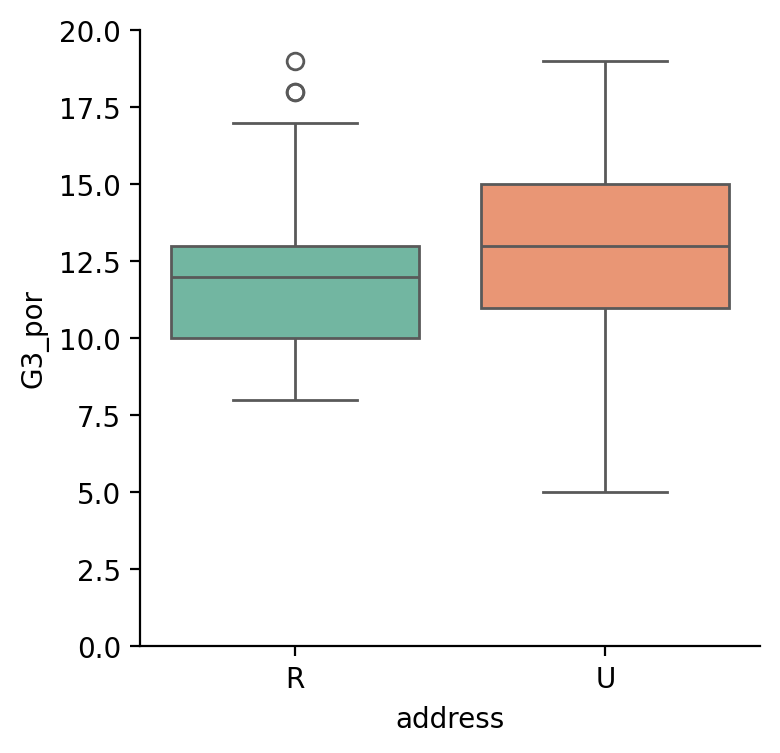

In [76]:
# urban vs rural (address) student G3 score
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sns.boxplot(x='address', y='G3_por', data=data_no_drop, palette='Set2')
plt.ylim(0, 20)
sns.despine()

/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_22530/2493227769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y='G3_math', data=data_no_drop, palette='Set2')
/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_22530/2493227769.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y='G3_por', data=data_no_drop, palette='Set2')


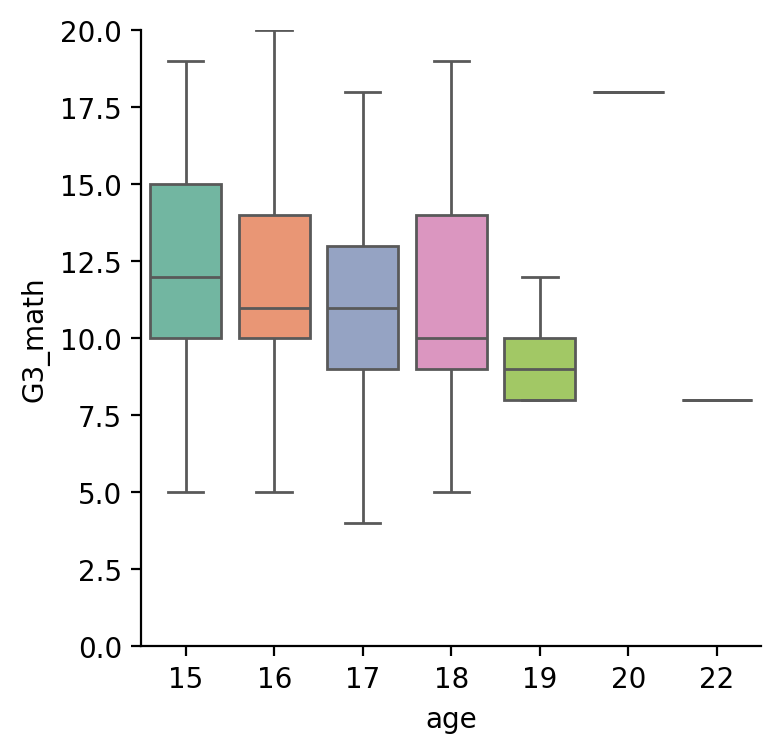

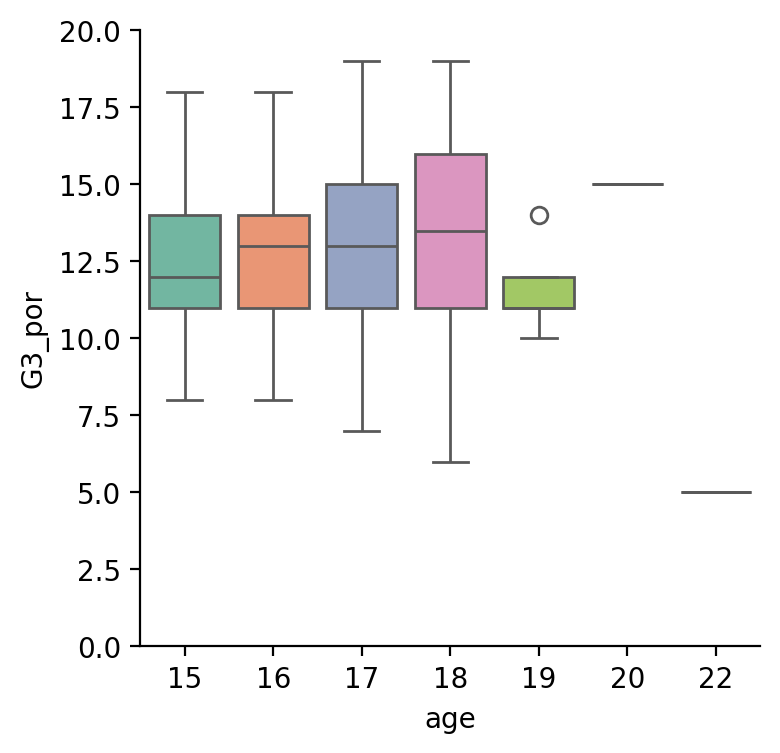

In [82]:
# age vs G3 score
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sns.boxplot(x='age', y='G3_math', data=data_no_drop, palette='Set2')
plt.ylim(0, 20)
sns.despine()
# age vs G3 score
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sns.boxplot(x='age', y='G3_por', data=data_no_drop, palette='Set2')
plt.ylim(0, 20)
sns.despine()


/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_22530/3619371403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='G3_math', data=data_no_drop, palette='Set2')
/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_22530/3619371403.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='G3_por', data=data_no_drop, palette='Set2')


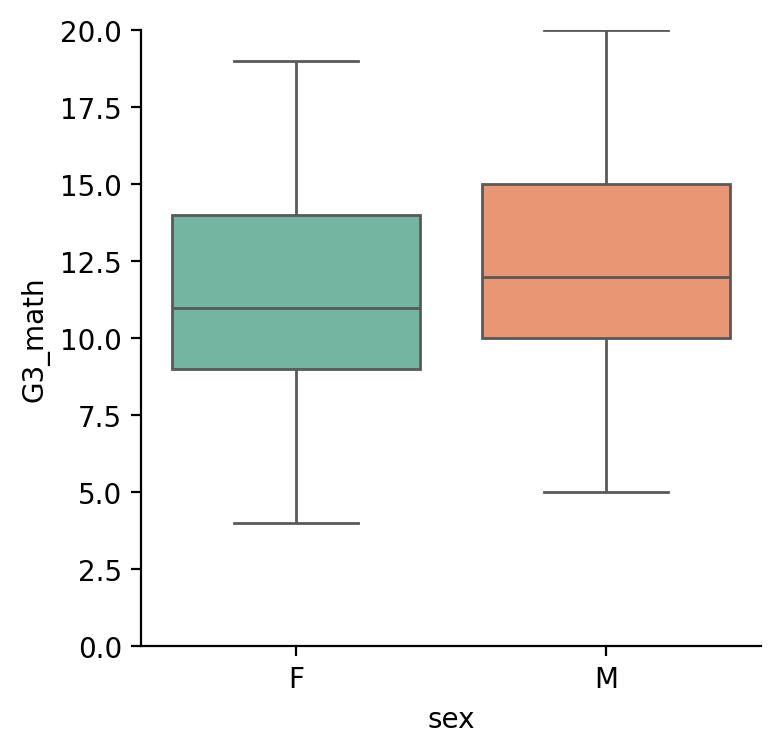

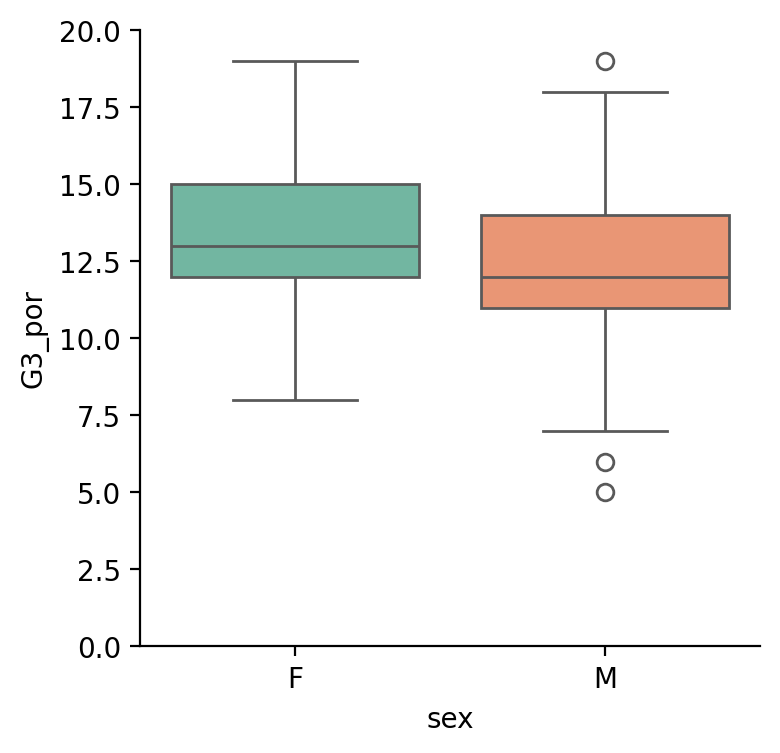

In [84]:
# age vs G3 score
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sns.boxplot(x='sex', y='G3_math', data=data_no_drop, palette='Set2')
plt.ylim(0, 20)
sns.despine()
# age vs G3 score
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sns.boxplot(x='sex', y='G3_por', data=data_no_drop, palette='Set2')
plt.ylim(0, 20)
sns.despine()


/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_22530/4215685174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='goout', y='G3_math', data=data_no_drop, palette='Set2')
/var/folders/1w/nb8zzzyd2b19zfmmnsf651j00000gn/T/ipykernel_22530/4215685174.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='goout', y='G3_por', data=data_no_drop, palette='Set2')


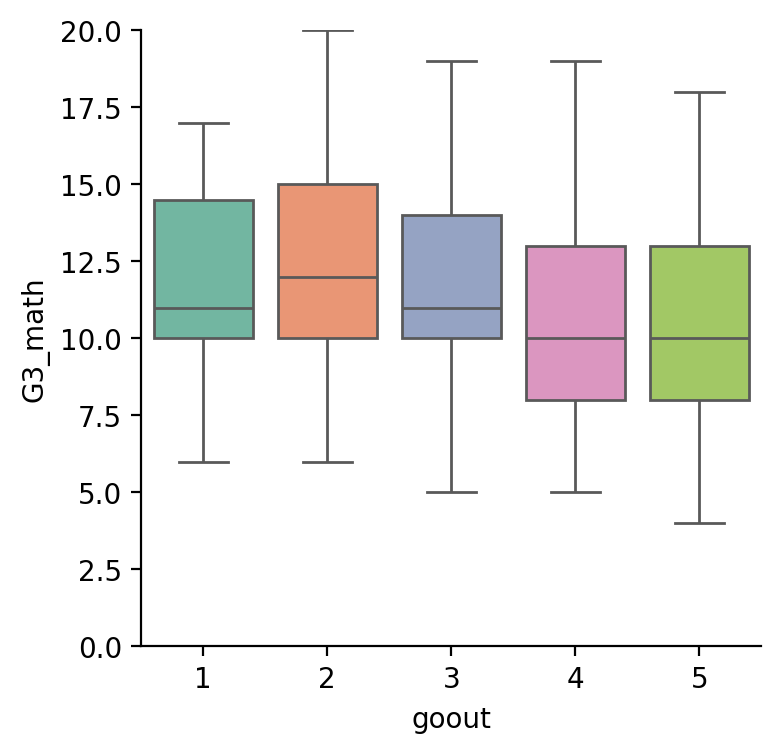

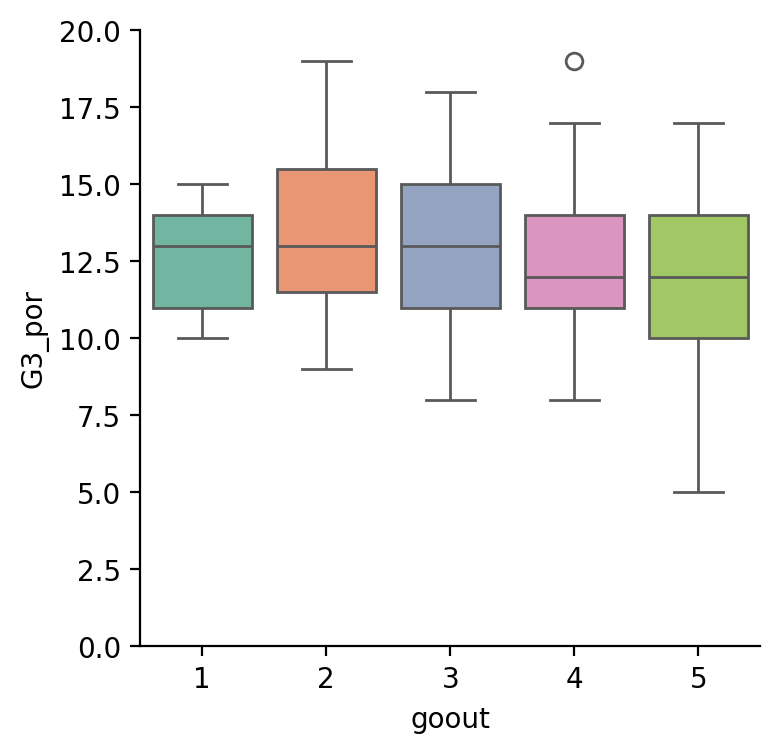

In [86]:
# goingout vs G3 score
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sns.boxplot(x='goout', y='G3_math', data=data_no_drop, palette='Set2')
plt.ylim(0, 20)
sns.despine()
# goingout vs G3 score
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sns.boxplot(x='goout', y='G3_por', data=data_no_drop, palette='Set2')
plt.ylim(0, 20)
sns.despine()
